# Introduction
In this notebook, EDA is performed on the wrangled Starcraft 2 dataset. The data is examined for correlations, trends and feature importances. 

## Table of Contents
- [Importing Libraries](#section1)
- [Examining Distributions](#section2)
    - [League Index Distribution](#section3)
    - [Heatmap](#section4)
    - [League Index vs Features](#section5)
    - [Statistical Tests](#section6)
- [Feature Importance](#section7)
- [League to League Feature Importance](#section8)

### Importing Libraries <a name="section1"></a>
Import necessary libraries and cleaned data set. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.inspection import permutation_importance
from scipy import stats

Let's load the dataset and print out it's head to get a reminder of what it looks like.

In [2]:
starcraft_data = pd.read_csv('wrangled_starcraft_data.csv')
starcraft_data.drop('Unnamed: 0', axis=1, inplace=True)
starcraft_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [3]:
#To make the data easier to read
plt.rcParams['figure.figsize'] = (10, 10)
sns.set()

### Examining Distributions <a name="section2"></a>
In this section, different graphs and tests will be executed to get a idea of how the data correlates with itself. Distributions are also examined between the target variable of League Index and other various features.

#### League Index Distribution <a name="section3"></a>
Create a distribution graph for League Index to get an idea of how our target variable is distributed.

Text(0.5, 1.0, 'League Index Count Chart')

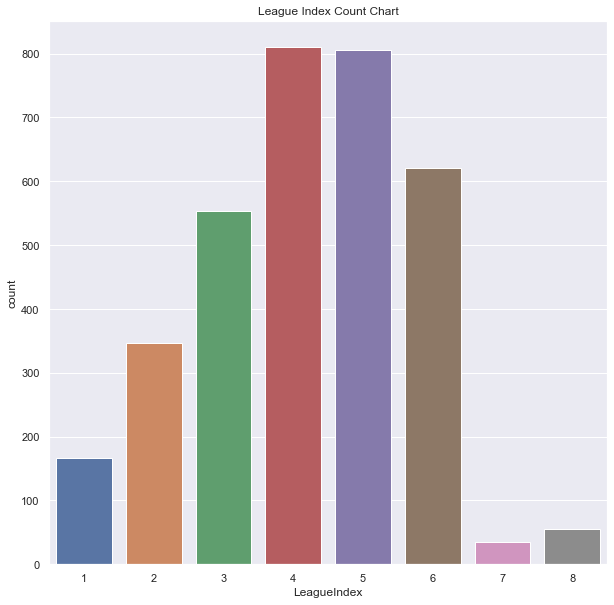

In [4]:
#Create a distribution graph for League Index
(sns.countplot(x=starcraft_data['LeagueIndex']).set_title('League Index Count Chart'))

Seems most of our data is coming from master and below. This would make sense as only 200 players from each reason are allowed in grandmaster each season and professionals typically belong in this league as well.

#### Heatmap <a name="section4"></a>
Let's make a heatmap to see which variables correlate most to our target variable of League Index

Text(0.5, 1.0, 'Pearson Heat Map')

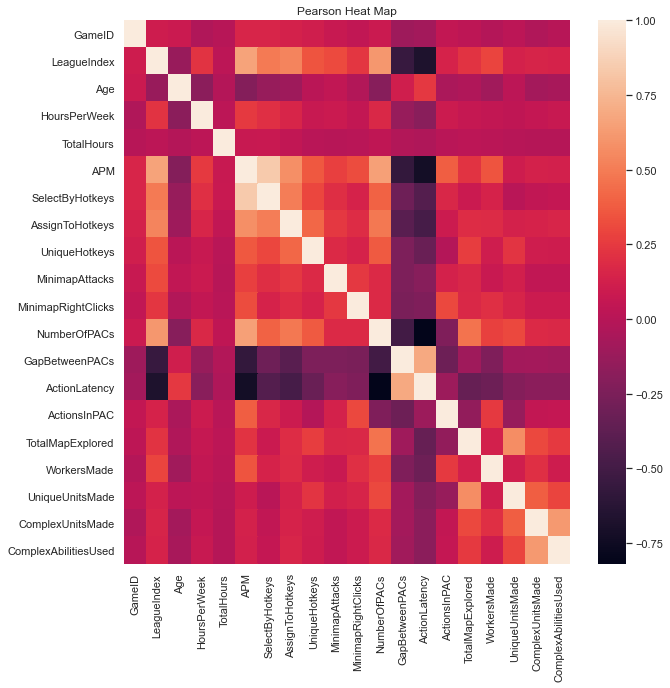

In [5]:
(sns.heatmap(starcraft_data.corr()).set_title('Pearson Heat Map'))

It seems that APM and Number of PACs have the highest positive correlations with League Index, while Action Latency and Gap Between PACs have the strongest negative correlations. At first glance, these things make sense. I have long been a starcraft enthusiast. I have spent many hours playing the game, studying the stratgies and trying to improve. One thing that was always mentioned was getting one's APM up, as a lot of professional players have an high APM. The speed at which one can process information and makes decisions correlating to a high League Index makes sense as well, this is what PAC is describing. It also makes sense that if one has bad internet connection or slow decision making skills their index would be lower. Let's explore these correlations further with some boxplots.

#### League Index vs Features <a name="section5"></a>
I picked a few features to examine based on the heatmap, choosing the features with the most correlation.

Text(0.5, 1.0, 'League Index vs APM')

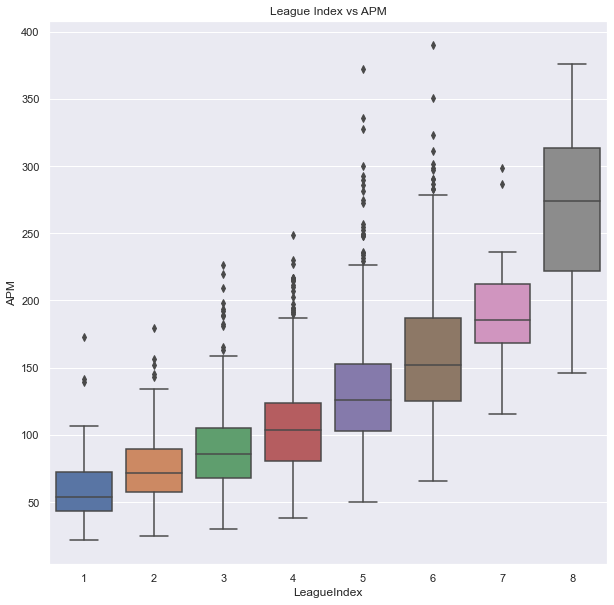

In [6]:
#Boxplot for League Index vs APM
(sns.boxplot(x='LeagueIndex', y='APM', data=starcraft_data).set_title('League Index vs APM'))

Text(0.5, 1.0, 'League Index vs Number of PACs')

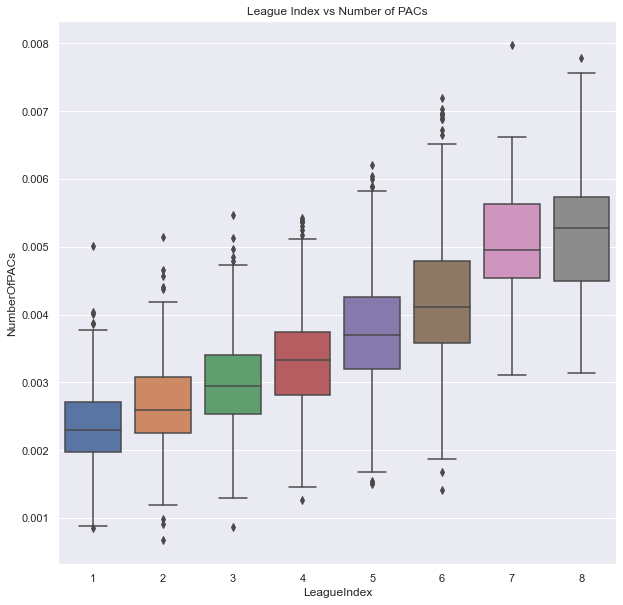

In [7]:
#Boxplot for League Index vs Number of PACs
sns.boxplot(x='LeagueIndex', y='NumberOfPACs', data=starcraft_data).set_title('League Index vs Number of PACs')

Text(0.5, 1.0, 'League Index vs Action Latency')

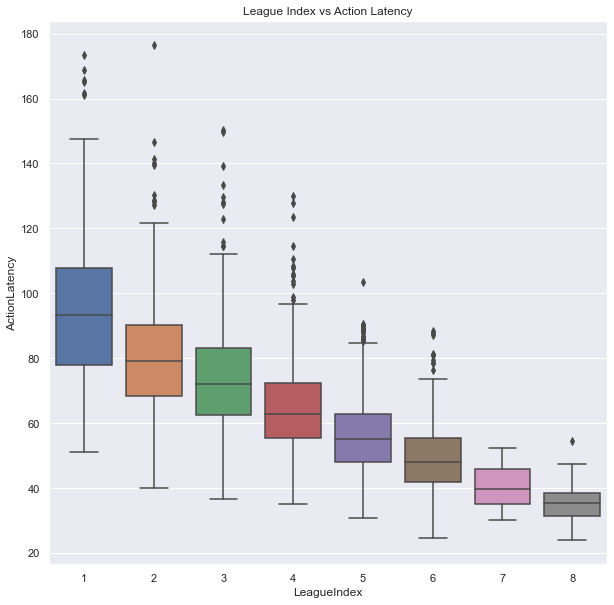

In [8]:
#Boxplot for League Index vs Action Latency
sns.boxplot(x='LeagueIndex', y='ActionLatency', data=starcraft_data).set_title('League Index vs Action Latency')

Text(0.5, 1.0, 'League Index vs Gap Between PACs')

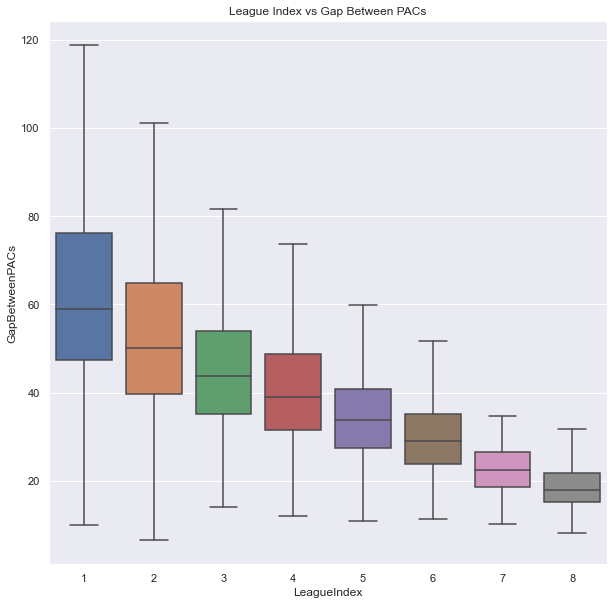

In [9]:
#Boxplot for League Index vs Gaps Between PACs
(sns.boxplot(x='LeagueIndex', y='GapBetweenPACs', data=starcraft_data, showfliers=False).set_title('League Index vs Gap Between PACs'))

Text(0.5, 1.0, 'League Index vs Select by Hotkeys')

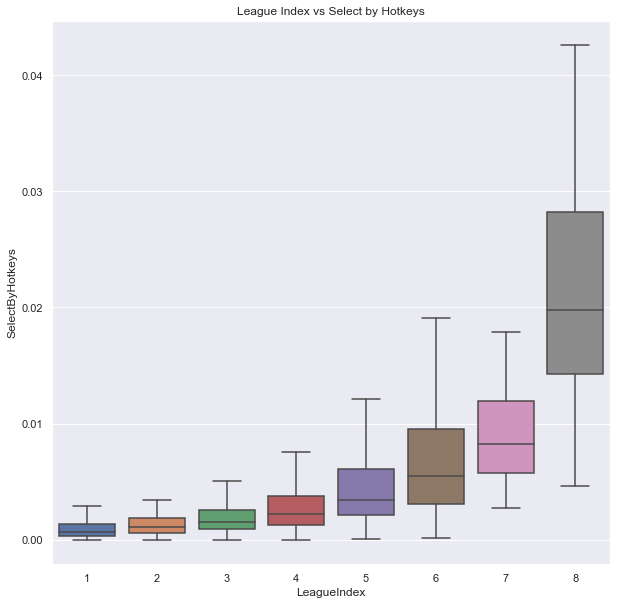

In [10]:
#Boxplot for League Index vs Selecty by Hotkeys
(sns.boxplot(x='LeagueIndex', y='SelectByHotkeys', data=starcraft_data, showfliers=False).set_title('League Index vs Select by Hotkeys'))

#### Statistical Tests <a name="section6"></a>
Here statsitical tests are preformed to ensure the distributions above are not due to chance. A t-test is run for APM leagues 7 to 8 since there isn't a lot of data for these two groups. Anova tests are preformed on the rest to get results for the entire distributions.

In [11]:
#Run T-test for APM distribution
stats.ttest_ind(starcraft_data['APM'][starcraft_data['LeagueIndex']==7], 
                starcraft_data['APM'][starcraft_data['LeagueIndex']==8])

Ttest_indResult(statistic=-7.0826074526666964, pvalue=3.3138052521674904e-10)

In [12]:
#Will use this funciton to run anova tests for features vs League Index. 
#Boxcox is used to ensure data is close to normal. 
def anovatest(column):
    bronze, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==1])
    silver, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==2])
    gold, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==3])
    platinum, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==4])
    diamond, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==5])
    master, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==6])
    grandmaster, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==7])
    pro, fitted_lambda = stats.boxcox(starcraft_data[column][starcraft_data['LeagueIndex']==8])
    return stats.f_oneway(bronze, silver, gold, platinum, diamond, master, grandmaster, pro)

In [14]:
print("Test result for APM:{}".format(anovatest('APM')))
print("Test result for Number of PACs:{}".format(anovatest('NumberOfPACs')))
print("Test result for Action Latency:{}".format(anovatest('ActionLatency')))
print("Test result for Gaps Between PACs:{}".format(anovatest('GapBetweenPACs')))

Test result for APM:F_onewayResult(statistic=6226.628341894563, pvalue=0.0)
Test result for Number of PACs:F_onewayResult(statistic=505042.75342907524, pvalue=0.0)
Test result for Action Latency:F_onewayResult(statistic=12608.578046744036, pvalue=0.0)
Test result for Gaps Between PACs:F_onewayResult(statistic=1609.5394584409019, pvalue=0.0)


The above varibles all seem important. Let's run a forest regressor algorithm to get a qunatative look at this.

### Feature Importances <a name="section7"></a>
In this section a Random Forest Classifier will be used to determine feature importances. This will help determine which skills one should foucs on when trying to improve their Starcraft 2 game. 

In [15]:
#Need to fill in some NaN values for regressor to work. Going to fill with averages
#I realize this is a poor method since professionals are going to have a much higher averages than normal.
#The professional games represent >2% of the data here and this is just to get feature importance.
starcraft_data_nanfree = starcraft_data.copy()
starcraft_data_nanfree['Age'] = starcraft_data_nanfree['Age'].fillna(starcraft_data_nanfree['Age'].mean())
starcraft_data_nanfree['HoursPerWeek'] = starcraft_data_nanfree['HoursPerWeek'].fillna(starcraft_data_nanfree['HoursPerWeek'].mean())
starcraft_data_nanfree['TotalHours'] = starcraft_data_nanfree['TotalHours'].fillna(starcraft_data_nanfree['TotalHours'].mean())

In [16]:
#Split data and train a classifier
X = starcraft_data_nanfree.drop(['LeagueIndex', 'GameID'], axis=1)
y = starcraft_data_nanfree['LeagueIndex']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=10)
forest_class = RandomForestClassifier(random_state=10)
forest_class.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

Text(0.5, 1.0, 'RFC variable importance')

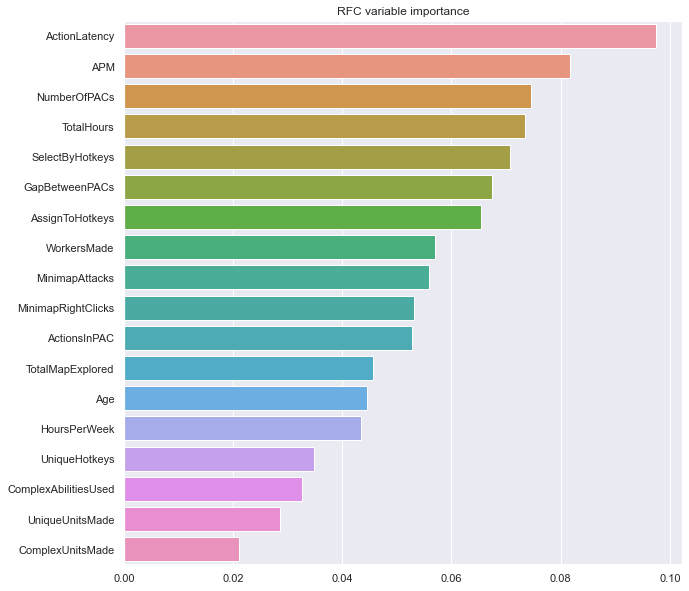

In [17]:
#Create graph showing feature importances
sorted_index_class = (-forest_class.feature_importances_).argsort()
(sns.barplot(x=forest_class.feature_importances_[sorted_index_class], y=X.columns[sorted_index_class])
            .set_title('RFC variable importance'))

### League to League Feature Importance <a name="section8"></a>
In this section a Random Forest Classifier is used to determine feature importances for each leauge transition. 

In [18]:
#Write a function that makes a classifier for each transition.
#Find the importance of each feature for each transition
def get_classifier_vars(intial, final):
    starcraft_data_ = starcraft_data_nanfree[starcraft_data_nanfree['LeagueIndex'].isin([intial, final])]
    X_ = starcraft_data_.drop(['LeagueIndex', 'GameID'], axis=1)
    y_ = starcraft_data_['LeagueIndex']
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.25, random_state=10)
    forest_class_ = RandomForestClassifier(random_state=10)
    forest_class_.fit(X_train_, y_train_)
    return forest_class_.feature_importances_
feature_importance_1to2 = get_classifier_vars(1, 2)
feature_importance_2to3 = get_classifier_vars(2, 3)
feature_importance_3to4 = get_classifier_vars(3, 4)
feature_importance_4to5 = get_classifier_vars(4, 5)
feature_importance_5to6 = get_classifier_vars(5, 6)
feature_importance_6to7 = get_classifier_vars(6, 7)

In [19]:
#Because means were used for Total Hours, Age and Hours per Week for the pro league, these rows need to
#be dropped now. 
starcraft_data_ = starcraft_data_nanfree[starcraft_data_nanfree['LeagueIndex'].isin([7, 8])]
X_ = starcraft_data_.drop(['LeagueIndex', 'GameID', 'Age', 'TotalHours', 'HoursPerWeek'], axis=1)
y_ = starcraft_data_['LeagueIndex']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.25, random_state=10)
forest_class_ = RandomForestClassifier(random_state=10)
forest_class_.fit(X_train_, y_train_)
feature_importance_7to8 = forest_class_.feature_importances_

In [20]:
#Put the feature importance into a Dataframe for easy manipulation. 
importance_df = pd.DataFrame()
def add_to_impor_df(feature_impor, column_name):
    impor = pd.Series(feature_impor, index=X.columns)
    importance_df[column_name] = impor
add_to_impor_df(feature_importance_1to2, '1to2')
add_to_impor_df(feature_importance_2to3, '2to3')
add_to_impor_df(feature_importance_3to4, '3to4')
add_to_impor_df(feature_importance_4to5, '4to5')
add_to_impor_df(feature_importance_5to6, '5to6')
add_to_impor_df(feature_importance_6to7, '6to7')

In [21]:
#Drop Age, HoursPerWeek and TotalHours
impor = pd.Series(feature_importance_7to8, 
                  index=X.drop(['Age', 'HoursPerWeek', 'TotalHours'], axis=1).columns)
importance_df['7to8'] = impor

In [22]:
#Examine df to ensure Age, HoursPerWeek and TotalHours were dropped for 7to8. 
importance_df

,1to2,2to3,3to4,4to5,5to6,6to7,7to8
Age,0.049246,0.039410,0.042403,0.034737,0.034313,0.033510,NaN
HoursPerWeek,0.035465,0.037923,0.039747,0.034583,0.050355,0.079665,NaN
TotalHours,0.068525,0.083505,0.062978,0.063418,0.071459,0.091462,NaN
APM,0.085222,0.072276,0.083897,0.086590,0.076366,0.051779,0.153428
SelectByHotkeys,0.065196,0.067485,0.060533,0.074171,0.070551,0.042914,0.165271
AssignToHotkeys,0.064127,0.065520,0.067400,0.059560,0.060965,0.092378,0.076612
UniqueHotkeys,0.030774,0.033636,0.033716,0.031118,0.033712,0.034474,0.029728
MinimapAttacks,0.033213,0.042364,0.053735,0.056770,0.058505,0.078743,0.047403
MinimapRightClicks,0.060207,0.061512,0.057523,0.052247,0.052025,0.039855,0.047859
NumberOfPACs,0.067466,0.085660,0.078853,0.076513,0.072833,0.071790,0.053854


Text(0.5, 1.0, 'Feature Importance by League Groups')

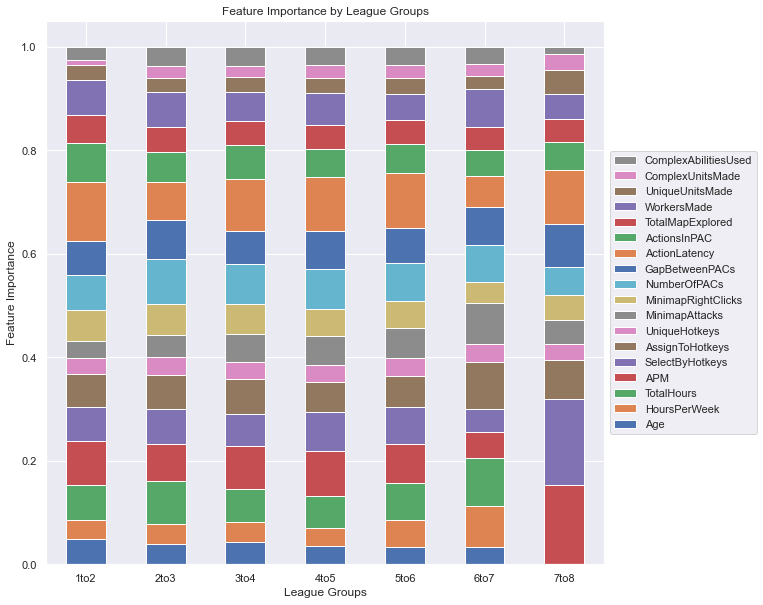

In [23]:
ax = importance_df.T.plot(kind='bar', stacked=True)
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('League Groups')
plt.ylabel('Feature Importance')
plt.xticks(rotation=360)
plt.title('Feature Importance by League Groups')

In [24]:
#Get the top five features for each transition
top_5_df = pd.DataFrame()
for c in importance_df.columns:
    top_5 = importance_df[c].nlargest(5)
    top_5_df = pd.concat([top_5_df, top_5], axis=1)

In [25]:
#Examine new df and ensure each column contains only five values. 
top_5_df

,1to2,2to3,3to4,4to5,5to6,6to7,7to8
ActionLatency,0.113441,0.073829,0.100376,0.104218,0.105643,NaN,0.104134
APM,0.085222,0.072276,0.083897,0.086590,0.076366,NaN,0.153428
ActionsInPAC,0.075832,NaN,0.064938,NaN,NaN,NaN,NaN
WorkersMade,0.068671,NaN,NaN,NaN,NaN,0.074923,NaN
TotalHours,0.068525,0.083505,NaN,NaN,0.071459,0.091462,NaN
NumberOfPACs,NaN,0.085660,0.078853,0.076513,0.072833,NaN,NaN
GapBetweenPACs,NaN,0.075668,NaN,0.074106,NaN,NaN,0.083515
AssignToHotkeys,NaN,NaN,0.067400,NaN,NaN,0.092378,0.076612
SelectByHotkeys,NaN,NaN,NaN,0.074171,0.070551,NaN,0.165271
HoursPerWeek,NaN,NaN,NaN,NaN,NaN,0.079665,NaN


In [26]:
#Turn each value into a percentage of the whole column
for c in top_5_df.columns: 
    top_5_df[c] = top_5_df[c]/top_5_df[c].sum()

Text(0.5, 1.0, 'Feature Importance by League Groups')

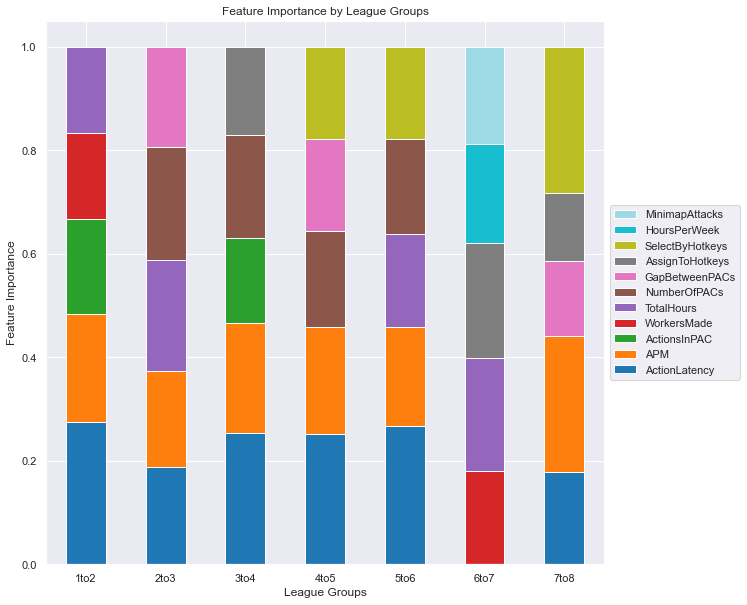

In [27]:
#Create graph showing each transition's top 5 important features
ax = top_5_df.T.plot(kind='bar', stacked=True, cmap='tab20')
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('League Groups')
plt.ylabel('Feature Importance')
plt.xticks(rotation=360)
plt.title('Feature Importance by League Groups')